In [111]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('강의계획서_심교.csv',encoding='cp949')

In [84]:
df.head(3)

,연도,과목번호,원어여부,비고,수강신청유의사항,과제비율,교재,과제내용,과제수,주별강의계획서,중간고사,기말고사
0,2022,1501,영어,원어강의(영어),Regular attendance and participation is required.,"{'출석률': 10.0, '중간고사비율': 25.0, '기말고사비율': 25.0, ...","{1: '주교재', 2: 'Prism 4 Reading', 3: 'Jessica W...","{1: 'Midterm Presentation', 2: '20221014', 3: ...",2,"{1: '08/29 ~ 09/03', 2: 'Introduction', 3: 'Co...","{'주제': 'Midterm Exam', '강의내용': 'Midterm Exam',...","{'주제': 'Final Exam', '강의내용': 'Final Exam', '수업..."
1,2022,1502,,토론식 강의,본 강의는 토론식 수업으로 수업 중 일부가 토론 형태로 진행됩니다.\n★ 토론식 수...,"{'출석률': 15.0, '중간고사비율': 25.0, '기말고사비율': 30.0, ...","{1: '주교재', 2: '인간관계의 심리학 (젊은이를 위한)', 3: '권석만',...","{1: '서평(또는 독후감)', 2: '', 3: '', 4: '보물지도 만들기',...",2,"{1: '08/29 ~ 09/03', 2: 'Orientation', 3: '- 강...","{'주제': '중간고사', '강의내용': '- 중간고사', '수업유형': '', '...","{'주제': '기말고사', '강의내용': '- 기말고사', '수업유형': '', '..."
2,2022,1503,,,1. 이 강의는 수강생의 성실성이 요구됩니다. 신중히 수강신청하세요.\n2. 지각 ...,"{'출석률': 10.0, '중간고사비율': 35.0, '기말고사비율': 35.0, ...","{1: '참고문헌', 2: '논리는 나의 힘 (생각의 힘을 길러 주는 논리 학습의 ...","{1: '진리표에 관하여', 2: '', 3: '', 4: '벤다이어그램에 관하여'...",2,"{1: '08/29 ~ 09/03', 2: '강의 내용과 진행 소개', 3: '강의...","{'주제': '중간고사', '강의내용': '시험', '수업유형': '대면시험', '...","{'주제': '학기말고사', '강의내용': '시험', '수업유형': '대면시험', ..."


In [85]:
df.shape

(569, 12)

In [86]:
df[df['수강신청유의사항'] == '#NAME?']

,연도,과목번호,원어여부,비고,수강신청유의사항,과제비율,교재,과제내용,과제수,주별강의계획서,중간고사,기말고사


- 원어강의 여부
- 선수과목 존재 여부
- 조별과제 존재 여부
- 과제 개수
- 시험 과제대체 여부
- 패논패 여부

In [90]:
df.rename(columns={'과제비율':'평가비율'},inplace=True)

In [91]:
# 딕셔너리로 저장된 데이터를 str에서 딕셔너리로 변환
def convert_to_dictionary(x):
    try:
        return ast.literal_eval(x)
    except Exception:
        return x

In [92]:
df['평가비율'] = df['평가비율'].apply(convert_to_dictionary)
df['교재'] = df['교재'].apply(convert_to_dictionary)
df['과제내용'] = df['과제내용'].apply(convert_to_dictionary)
df['주별강의계획서'] = df['주별강의계획서'].apply(convert_to_dictionary)
df['중간고사'] = df['중간고사'].apply(convert_to_dictionary)
df['기말고사'] = df['기말고사'].apply(convert_to_dictionary)

### 선수과목 존재 여부

In [93]:
# 결측치 처리
df['비고'] = df['비고'].fillna('')
df['수강신청유의사항'] = df['수강신청유의사항'].fillna('')

In [94]:
keywords = ['선수과목', '선이수', '이수요망', '이수자만', 'prerequisite']
no_keywords = ['선수과목이필', '선수과목은필', '선수과목은없', 'keytheories', 'Noprerequisite']

def filter_text(raw_text):
    # 텍스트 내 공백 제거
    text = raw_text.replace(" ", "")
    # 키워드 포함 여부 확인
    contains_keyword = any(keyword in text for keyword in keywords)
    # 제외 키워드 포함 여부 확인
    contains_no_keyword = any(no_keyword in text for no_keyword in no_keywords)
    # 조건에 따라 T/F 반환
    return contains_keyword and not contains_no_keyword

# DataFrame에 두 컬럼에 대해 조건 적용
df['선수과목존재여부'] = df.apply(
    lambda row: 1 if (filter_text(row['비고']) or filter_text(row['수강신청유의사항'])) else 0, 
    axis=1
)

In [95]:
df.선수과목존재여부.value_counts()

선수과목존재여부
0    568
1      1
Name: count, dtype: int64

### 조별과제 존재 여부

In [96]:
# 평가비율이 기재되지 않은 경우 검색
for i in range(len(df)):
    try:
        df['평가비율'][i].keys()
        pass
    except:
        print(f"{df.loc[i,'연도']}년 과목번호: {df.loc[i,'과목번호']}")

In [97]:
# 과목별 평가항목 검색
unique_criterion = set()
for i in range(len(df)):
    try:
        criterion = list(df['평가비율'][i].keys())
        unique_criterion.update(criterion)
    except:
        pass

In [98]:
# list(unique_criterion)

In [99]:
keywords = ['팀프로젝트', '조별과제', '조별활동', '조별발표', '팀플', '팀원', 'team']

def filter_text(raw_text):
    # 텍스트 내 공백 제거
    text = raw_text.replace(" ", "")
    # 키워드 포함 여부 확인
    return any(keyword in text for keyword in keywords)

# DataFrame에 두 컬럼에 대해 조건 적용
df['조별과제존재여부'] = df.apply(
    lambda row: 1 if (filter_text(row['비고']) or filter_text(row['수강신청유의사항'])) else 0, 
    axis=1
)

In [100]:
# filtered_rows = df[df['수강신청유의사항'].apply(filter_text)]
# for raw_text in filtered_rows['수강신청유의사항']:
#     print(raw_text)
#     print('-----------')

In [101]:
df.조별과제존재여부.value_counts()

조별과제존재여부
0    546
1     23
Name: count, dtype: int64

## 시험 과제대체 여부
- 해당 교과목들은 과제대체를 중간고사만 하는지, 기말고사만 하는지, 둘 다 하는지는 우선 파악하지 못하였음.

In [102]:
df['시험과제대체여부'] = 0 

for i in range(len(df)):
    # 딕셔너리로 저장된 데이터의 value 가져오기
    try:
        mid_exam = df.loc[i,'중간고사'].values()
        final_exam = df.loc[i,'기말고사'].values()
    except:
        pass

    # 원소들을 하나의 문자열로 합친 후 공백을 제거하기
    mid_text = ''.join(mid_exam).replace(" ", "")
    final_text = ''.join(final_exam).replace(" ", "")
    text = mid_text + final_text    

    # 시험 과제대체 여부 검색
    if '대체' in text or '발표' in text or 'project' in text or 'presentation' in text:
        df.loc[i,'시험과제대체여부'] = 1
    elif '과제대체' in df.loc[i,'수강신청유의사항'] or '대체과제' in df.loc[i,'수강신청유의사항']:
        df.loc[i,'시험과제대체여부'] = 1
    elif '과제대체' in df.loc[i,'비고'] or '대체과제' in df.loc[i,'비고']:
        df.loc[i,'시험과제대체여부'] = 1

In [103]:
df.시험과제대체여부.value_counts()

시험과제대체여부
0    507
1     62
Name: count, dtype: int64

## 패논패 여부

In [104]:
keywords = ['Pass','P/N','패스과목','pass과목','nonpass']

def filter_text(raw_text):
    # 텍스트 내 공백 제거
    text = raw_text.replace(" ", "")
    # 키워드 포함 여부 확인
    return any(keyword in text for keyword in keywords)

# DataFrame에 두 컬럼에 대해 조건 적용
df['패논패여부'] = df.apply(
    lambda row: 1 if (filter_text(row['비고']) or filter_text(row['수강신청유의사항'])) else 0, 
    axis=1
)

In [105]:
df.패논패여부.value_counts()

패논패여부
0    554
1     15
Name: count, dtype: int64

## 최종

In [106]:
df.columns

Index(['연도', '과목번호', '원어여부', '비고', '수강신청유의사항', '평가비율', '교재', '과제내용', '과제수',
       '주별강의계획서', '중간고사', '기말고사', '선수과목존재여부', '조별과제존재여부', '시험과제대체여부', '패논패여부'],
      dtype='object')

In [107]:
final_df = df[['연도', '과목번호', '원어여부', '과제수',
               '선수과목존재여부', '조별과제존재여부', '시험과제대체여부', '패논패여부']]

In [108]:
final_df.shape

(569, 8)

In [109]:
final_df.head(10)

,연도,과목번호,원어여부,과제수,선수과목존재여부,조별과제존재여부,시험과제대체여부,패논패여부
0,2022,1501,영어,2,0,0,0,0
1,2022,1502,,2,0,0,0,0
2,2022,1503,,2,0,0,0,0
3,2022,1504,,3,0,0,0,0
4,2022,1505,,1,0,1,0,0
5,2022,1506,,1,0,0,0,0
6,2022,1507,,1,0,0,0,0
7,2022,1508,,1,0,0,0,0
8,2022,1509,,2,0,0,0,0
9,2022,1510,,2,0,0,0,0


In [110]:
final_df.to_csv('강의계획서_심교_전처리.csv',index=False,encoding='cp949')

## EDA

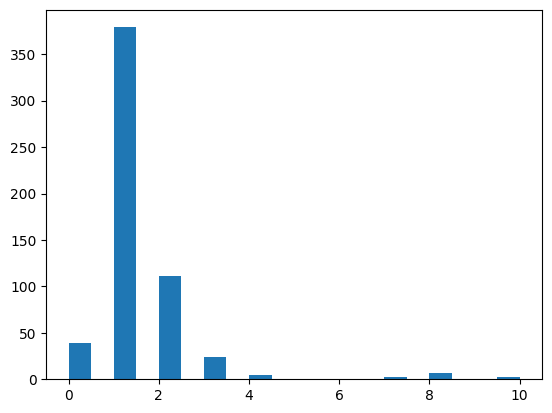

In [112]:
plt.hist(df.과제수,bins=20)
plt.show()

In [113]:
df.원어여부.value_counts()

원어여부
      546
영어     23
Name: count, dtype: int64

In [114]:
df.선수과목존재여부.value_counts()

선수과목존재여부
0    568
1      1
Name: count, dtype: int64

In [115]:
df.조별과제존재여부.value_counts()

조별과제존재여부
0    546
1     23
Name: count, dtype: int64

In [116]:
df.시험과제대체여부.value_counts()

시험과제대체여부
0    507
1     62
Name: count, dtype: int64

In [117]:
df.패논패여부.value_counts()

패논패여부
0    554
1     15
Name: count, dtype: int64